2017 09 12

In [16]:
import pandas as pd
import pandas as pd
from StringIO import StringIO
import sys
import re
import string
import time

import glob # read multiple files
import os
import os.path
from os import getcwd
from os.path import join
from os.path import basename   # get file name
import collections
# http://textract.readthedocs.io/en/latest/python_package.html
# import textract
# https://github.com/euske/pdfminer/
# import PyPDF2 # https://stackoverflow.com/questions/34837707/extracting-text-from-a-pdf-file-using-python
#https://pypi.python.org/pypi/slate

# 
from cStringIO import StringIO
import os
import sys, getopt
# http://stanford.edu/~mgorkove/cgi-bin/rpython_tutorials/Using%20Python%20to%20Convert%20PDFs%20to%20Text%20Files.php
# http://euske.github.io/pdfminer/programming.html#tocextract
# https://github.com/euske/pdfminer/blob/master/pdfminer/pdfdocument.py

In [17]:
port_df = pd.read_csv('search_terms.csv',encoding='utf-8')
port_df.head()

,﻿Item,Link,Type
0,Aarhus,http://www.odaa.dk/,International Regional
1,Alabama,http://open.alabama.gov/,US State
2,Alberta,http://data.alberta.ca/,International Regional
3,Albuquerque,http://www.cabq.gov/abq-data/,US City or County
4,Alkmaar,http://www.alkmaar.nl/opendata,International Regional


In [18]:
with open('springer_search_string.txt','r') as file:
    springer_string = file.read()

springer_string_set=set(springer_string.split(' '))
springer_string_set_new = set()
for item in springer_string_set:
    item = item.replace('"', '').strip()
    items=item.split('\n')
    for small_item in items:
        springer_string_set_new.add(small_item)

springer_string_set_new.remove('')
# springer_string_set_new.remove('OR')
print springer_string_set_new

set(['dati.gov.it', 'caib.es/caibdatafront', 'data.nantes.fr', 'opendata.go.tz', 'portalu.de/portal', 'dati.veneto.it', 'dati.comune.bologna.it', 'openguelph.wpengine.com/open-data-guelph', 'data.baltimorecity.gov', 'lexingtonky.gov', 'data.govt.nz', 'comune.vicenza.it/uffici/dipgenpers/sistinf/sit', 'salford.gov.uk/opendata', 'data.illinois.gov/champaign', 'openaid.se', 'data.denvergov.org', 'data.austintexas.gov', 'data.linz.gv.at', 'colorado.gov/data', 'open.canada.ca', 'opendata.bigovernment.ru', 'openkent.org.uk', 'territorio.provincia.tn.it/portal', 'data.seattle.gov', 'data.gov.ma', 'zaragoza.es/ciudad/risp', 'nd.gov/gis', 'cartolleida.paeria.es/lleidaoberta', 'data.illinois.gov/bellevill', 'opendoor.ky.gov', 'data.virginia.gov', 'opendata.cityofnewyork.us', 'arvada.org/opendata', 'daten.rlp.de', 'data.opencolorado.org', 'rotterdamopendata', 'data.gouv.fr', 'niagarafalls.ca/services/open/data', 'data.rennes-metropole.fr', 'data.jyvaskyla.fi', 'raleighnc.gov/open', 'surrey.ca/cit

In [19]:
actual_search_string_df=pd.DataFrame(columns=['search_term','Link'])
actual_search_string_df['search_term']=list(springer_string_set_new)

In [20]:
link_set = set(port_df['Link'])
for i in range(len(actual_search_string_df)):
    search_term = actual_search_string_df['search_term'][i]
    for link in link_set:
        if search_term in link:
            actual_search_string_df.set_value(i, 'Link', link)
print actual_search_string_df

                                           search_term  \
0                                          dati.gov.it   
1                                caib.es/caibdatafront   
2                                       data.nantes.fr   
3                                       opendata.go.tz   
4                                    portalu.de/portal   
5                                       dati.veneto.it   
6                               dati.comune.bologna.it   
7             openguelph.wpengine.com/open-data-guelph   
8                               data.baltimorecity.gov   
9                                      lexingtonky.gov   
10                                        data.govt.nz   
11     comune.vicenza.it/uffici/dipgenpers/sistinf/sit   
12                             salford.gov.uk/opendata   
13                         data.illinois.gov/champaign   
14                                          openaid.se   
15                                  data.denvergov.org   
16            

In [21]:
actual_search_string_df.head(20)

,search_term,Link
0,dati.gov.it,http://www.dati.gov.it/
1,caib.es/caibdatafront,http://www.caib.es/caibdatafront/
2,data.nantes.fr,http://data.nantes.fr/
3,opendata.go.tz,http://opendata.go.tz/
4,portalu.de/portal,http://www.portalu.de/portal/default-page.psml
5,dati.veneto.it,http://dati.veneto.it/
6,dati.comune.bologna.it,http://dati.comune.bologna.it/
7,openguelph.wpengine.com/open-data-guelph,NaN
8,data.baltimorecity.gov,http://data.baltimorecity.gov/
9,lexingtonky.gov,http://www.lexingtonky.gov/index.aspx?page=416


In [7]:
merged_search_string = pd.merge(actual_search_string_df, port_df, how='outer', on=['Link'])
merged_search_string.head(20)
merged_search_string.to_csv('springer_merged_search_string.csv',encoding='utf-8')

# go to csv and edit #

In [39]:
# import csv

# with open('springer_scopus_search_string.csv', 'r') as in_file:
#     stripped = (line.strip() for line in in_file)
#     lines = (line.split(' ') for line in stripped if line)
#     with open('springer_scopus_search_term.csv', 'w') as out_file:
#         writer = csv.writer(out_file)
#         writer.writerows(lines)

In [22]:
springer_search_string_df = pd.read_csv('search_string_springer_edited.csv', index_col=None)
springer_search_string_df.drop(springer_search_string_df.columns[[0]], axis=1, inplace=True)
springer_search_string_df.head()

,search_term,Item,Type,Link
0,dati.gov.it,Italy,International Country,http://www.dati.gov.it/
1,caib.es/caibdatafront,Balearic Islands,International Regional,http://www.caib.es/caibdatafront/
2,data.nantes.fr,Nantes,International Regional,http://data.nantes.fr/
3,opendata.go.tz,Tanzania,International Country,http://opendata.go.tz/
4,portalu.de/portal,Environmental Portal,International Regional,http://www.portalu.de/portal/default-page.psml


In [60]:
count_item = pd.DataFrame(springer_search_string_df['Type'].value_counts()[:30])
count_item.head(30)

,Type
International Regional,159
International Country,54
US City or County,50
US State,38
Other State Related,8
US,1


In [61]:
springer_search_string_df['Item'].nunique()

302

In [27]:
springer_string_set_new = set(list(springer_search_string_df['search_term']))
print springer_string_set_new

set(['dati.gov.it', 'data.buenosaires.gob.ar', 'os.amsterdam.nl', 'alkmaar.nl/opendata', 'data.nantes.fr', 'opendata.go.tz', 'data.gov.au', 'dati.veneto.it', 'tampere.fi/avoindata', 'data.mos.ru', 'data.baltimorecity.gov', 'nhopengovt.org', 'lexingtonky.gov', 'data.govt.nz', 'data.ca.gov', 'data.illinois.gov/champaign', 'openaid.se', 'data.denvergov.org', 'data.austintexas.gov', 'maine.gov/data', 'data.linz.gv.at', 'data.codeforhouston.com', 'open.canada.ca', 'opendata.bigovernment.ru', 'openkent.org.uk', 'data.seattle.gov', 'opendataphilly.org', 'nebraska.gov/data', 'dati.venezia.it', 'data.fingal.ie', 'nd.gov/gis', 'cartolleida.paeria.es/lleidaoberta', 'data.illinois.gov/bellevill', 'opendoor.ky.gov', 'data.virginia.gov', 'opendata.cityofnewyork.us', 'data.gov.sk', 'daten.rlp.de', 'data.opencolorado.org', 'rotterdamopendata', 'princegeorge.ca/cityservices/online', 'data.gouv.fr', 'niagarafalls.ca/services/open/data', 'data.jyvaskyla.fi', 'raleighnc.gov/open', 'data.illinois.gov/ssmm'

In [24]:
springer_string_set_new.remove('data.gov')


#  extract URL -  springer #

In [25]:
path = os.getcwd()+'\\springer_txt'
allfiles = glob.glob(path+"\*txt")

extract_url_df=pd.DataFrame(columns=['filename','search_term','Item','Type'])
index = 0
for file_ in allfiles:
    filename_list=basename(file_).split('.')[0:-1]
    filename=' '.join(filename_list)
    try: 
        with open(file_,'r') as f:
            text = f.read().decode('utf8', 'ignore')
            text = text.encode('utf8')
    except:
        print 'open fail!'
        print filename
    
    for term in springer_string_set_new:
       
     #         term2 = term.replace('/','\/')
        if term in text:
            extract_url_df.set_value(index, 'filename', filename)
            extract_url_df.set_value(index, 'search_term', term)
            
            item = list(springer_search_string_df['Item'][springer_search_string_df['search_term']==term])[0]
            Type = list(springer_search_string_df['Type'][springer_search_string_df['search_term']==term])[0]
            extract_url_df.set_value(index, 'Item', item)
            extract_url_df.set_value(index, 'Type', Type)
            index = index +1
    
    if filename not in set(list(extract_url_df['filename'])):
        extract_url_df.set_value(index, 'filename', filename)
        if 'data.gov' in text:
            extract_url_df.set_value(index, 'search_term', 'data.gov')
            item = list(springer_search_string_df['Item'][springer_search_string_df['search_term']=='data.gov'])[0]
            Type = list(springer_search_string_df['Type'][springer_search_string_df['search_term']=='data.gov'])[0]
            extract_url_df.set_value(index, 'Item', item)
            extract_url_df.set_value(index, 'Type', Type)
            index = index +1
        else:
            extract_url_df.set_value(index, 'search_term', '')
            index = index +1
            
            
            
        
    
extract_url_df  


open fail!
anonymisation of?geographical distance matrices via?lipschitz embedding
open fail!
assessment of?the resource base for?engineered geothermal systems in?great britain
open fail!
farmers�� perceptions of?coexistence between?agriculture and?a?large scale coal seam gas development
open fail!
online platform for?applying space�Ctime scan statistics for?prospectively detecting emerging hot spots of?dengue fever
open fail!
spatial variation of?different rain systems during?el ni?o and?la ni?a periods over?india and?adjoining ocean


,filename,search_term,Item,Type
0,a general approach to the measurement of chang...,data.gov.uk,United Kingdom,International Country
1,activity based twitter sampling for content ba...,data.cityofchicago.org,Chicago,US City or County
2,adv ther 2013 30 2 127 51,data.gov.uk,United Kingdom,International Country
3,an,open-data.europa.eu,European Union,International Regional
4,analysis of agriculture data using data mining...,data.gov.in,India,International Country
5,and applications 2015 4 2,data.gov.uk,United Kingdom,International Country
6,and physical activity 2017 14 33,data.gov.uk,United Kingdom,International Country
7,anderson et al bmc health services research ...,,NaN,NaN
8,anonymisation of?geographical distance matrice...,,NaN,NaN
9,are long term fish assemblage changes in a lar...,stats.indiana.edu,Indiana,US State


In [26]:
extract_url_df.to_csv('extract_url_springer.csv')

# Springer #

In [14]:
path = os.getcwd()+'\\springer_txt'
allfiles = glob.glob(path+"\*txt")

extract_url_df=pd.DataFrame(columns=['filename','search_term','Item','Type'])
index = 0
for file_ in allfiles:
    filename_list=basename(file_).split('.')[0:-1]
    filename=' '.join(filename_list)
    try:
        with open(file_,'r') as f:
            text = f.read().decode('utf8', 'ignore')
#             text = text.encode('utf8')
    except: 
        print 'open fail!'
        print filename
    
    for term in springer_string_set_new:
       
     #         term2 = term.replace('/','\/')
        if term in text:
            extract_url_df.set_value(index, 'filename', filename)
            extract_url_df.set_value(index, 'search_term', term)
            
            item = list(springer_search_string_df['Item'][springer_search_string_df['search_term']==term])[0]
            Type = list(springer_search_string_df['Type'][springer_search_string_df['search_term']==term])[0]
            extract_url_df.set_value(index, 'Item', item)
            extract_url_df.set_value(index, 'Type', Type)
            index = index +1
    
    if filename not in set(list(extract_url_df['filename'])):
        extract_url_df.set_value(index, 'filename', filename)
        if 'data.gov' in text or 'Data.gov' in text:
            extract_url_df.set_value(index, 'search_term', 'data.gov')
            item = list(springer_search_string_df['Item'][springer_search_string_df['search_term']=='data.gov'])[0]
            Type = list(springer_search_string_df['Type'][springer_search_string_df['search_term']=='data.gov'])[0]
            extract_url_df.set_value(index, 'Item', item)
            extract_url_df.set_value(index, 'Type', Type)
            index = index +1
        else:
            extract_url_df.set_value(index, 'search_term', '')
            index = index +1
            
            
            
        
    
extract_url_df  


open fail!
anonymisation of?geographical distance matrices via?lipschitz embedding
open fail!
assessment of?the resource base for?engineered geothermal systems in?great britain
open fail!
farmers�� perceptions of?coexistence between?agriculture and?a?large scale coal seam gas development
open fail!
online platform for?applying space�Ctime scan statistics for?prospectively detecting emerging hot spots of?dengue fever
open fail!
spatial variation of?different rain systems during?el ni?o and?la ni?a periods over?india and?adjoining ocean


,filename,search_term,Item,Type
0,a general approach to the measurement of chang...,data.gov.uk,United Kingdom,International Country
1,activity based twitter sampling for content ba...,data.cityofchicago.org,Chicago,US City or County
2,adv ther 2013 30 2 127 51,data.gov.uk,United Kingdom,International Country
3,an,open-data.europa.eu,European Union,International Regional
4,analysis of agriculture data using data mining...,data.gov.in,India,International Country
5,and applications 2015 4 2,data.gov.uk,United Kingdom,International Country
6,and physical activity 2017 14 33,data.gov.uk,United Kingdom,International Country
7,anderson et al bmc health services research ...,data.gov,United States,US
8,anonymisation of?geographical distance matrice...,data.gov,United States,US
9,are long term fish assemblage changes in a lar...,stats.indiana.edu,Indiana,US State


In [15]:
extract_url_df.to_csv('springer_extract_url_df.csv')

# Scopus URL extract #

# deprecated # 

In [88]:
filename_1 = basename(allfiles[1])
with open(allfiles[3],'r') as f:
    text = f.read()
    
print text

978-1-5090-4117-6/17/$31.00 ©2017 IEEE

6000

ICASSP 2017

DATAANALYSISASAWEBSERVICE:ACASESTUDYUSINGIOTSENSORDATAAlirezaAhrabian1,SefkiKolozali1,ShirinEnshaeifar1,CliveCheong-Took2andPayamBarnaghi11UniversityofSurrey,ElectricalandElectronicEngineering,InstituteForCommunicationSystems2UniversityofSurrey,DepartmentofComputerScienceEmail:{a.ahrabian,s.kolozali,s.enshaeifar,c.cheongtook,p.barnaghi}@surrey.ac.ukABSTRACTTheadventofInternetofThings,hasresultedinthedevel-opmentofinfrastructureforcapturingandstoringdatafromdomainsrangingfromsmartdevices(e.g.smartphones)tosmartcities.Thisdataisoftenavailablepubliclyandhasen-abledawiderrangeofdataconsumerstoutilisesuchdatasetsforapplicationsrangingfromscientiﬁcexperimentationtoenhancingcommercialactivityforbusinesses.Accordinglythishasresultedintheneedforthedevelopmentdataanalysistoolsthatarebothsimpletouseandprovidethemosteffec-tivetoolsforagivendataset.Tothisend,weintroducedataanalysistoolsaswebservice,thatenablesthedataconsumertomakeasimpleHTT

In [90]:
str3='iot.ee.surrey.ac.uk:8080/datasets/trafﬁc'
str3 in text

True

In [78]:
str1='ba/s/dfa safsa dfsjfsjflkdsf'
str2='ba/s/'
str2 in str1

True

In [65]:
# springer_string_set_new
import re
for term in springer_string_set_new:
#     print term
#     if re.search("\b{0}\b".format(term),text.encode('utf-8')):    #if string found is in current line then print it
               
    if term in text:
        print term
        print list(springer_search_string_df['Item'][springer_search_string_df['search_term']==term])[0]

dados.gov.br
Brazil


In [79]:
print springer_string_set_new


set(['esd.ny.gov/NYSDataCenter.htm', 'os.amsterdam.nl', 'data.nantes.fr', 'opendata.go.tz', 'data.gov.au', 'dati.veneto.it', 'dati.comune.bologna.it', 'halifaxopendata.ca', 'dpipwe.tas.gov.au/sif', 'openguelph.wpengine.com/open-data-guelph', 'data.baltimorecity.gov', 'lexingtonky.gov', 'data.govt.nz', 'data.ca.gov', 'openaid.se', 'data.texas.gov', 'data.denvergov.org', 'data.austintexas.gov', 'data.linz.gv.at', 'comune.vicenza.it/uffici/dipgenpers/sistinf/sit/daticartografici', 'open.canada.ca', 'opendata.bigovernment.ru', 'openkent.org.uk', 'zaragoza.es/ciudad/risp', 'data.seattle.gov', 'dati.gov.it', 'tampere.fi/avoindata', 'nd.gov/gis', 'cartolleida.paeria.es/lleidaoberta', 'opendoor.ky.gov', 'data.virginia.gov', 'opendata.cityofnewyork.us', 'arvada.org/opendata', 'daten.rlp.de', 'donnees.ville.montreal.qc.ca', 'rotterdamopendata', 'data.gouv.fr', 'niagarafalls.ca/services/open/data', 'data.rennes-metropole.fr', 'data.jyvaskyla.fi', 'pub.stat.ee/px-web.2001/Dialog', 'raleighnc.gov/o

# process cleaned extract url files and produce stats #

In [52]:
scopus_cleaned=pd.read_csv('scopus_extract_url_cleaned.csv')
springer_cleaned=pd.read_csv('springer_extract_url_cleaned.csv')
IEEE_cleaned=pd.read_csv('extract_url_IEEE_cleaned.csv')

In [53]:
scopus_cleaned.head()

,Unnamed: 0,filename,search_term,Item,Type,note,title
0,0,1,data.gov.uk,United Kingdom,International Country,NaN,NaN
1,1,10 y risks of death and emergency re,data.gov.uk,United Kingdom,International Country,NaN,NaN
2,2,1210,data.cityofboston.gov,Boston,US City or County,NaN,Autonomous-Vehicle Public Transportation System
3,3,134,os.amsterdam.nl,Amsterdam O+S,International Regional,NaN,NaN
4,4,1700,stats.indiana.edu,Indiana,US State,NaN,NaN


In [54]:
scopus_cleaned['filename'].nunique()

1023

In [32]:
springer_cleaned['filename'].nunique()

82

In [33]:
IEEE_cleaned['filename'].nunique()

35

# combined stat and plotting # 

In [40]:
combined_cleaned=pd.read_csv('combined_extract_url_cleaned.csv')
combined_cleaned.head()

,Unnamed: 0,filename,search_term,Item,Type,note,title
0,0,1,data.gov.uk,United Kingdom,International Country,NaN,NaN
1,1,10 y risks of death and emergency re,data.gov.uk,United Kingdom,International Country,NaN,NaN
2,2,1210,data.cityofboston.gov,Boston,US City or County,NaN,Autonomous-Vehicle Public Transportation System
3,3,134,os.amsterdam.nl,Amsterdam O+S,International Regional,NaN,NaN
4,4,1700,stats.indiana.edu,Indiana,US State,NaN,NaN


In [229]:
combined_cleaned['Item'].nunique()

98

In [45]:
# import seaborn as sns
# sns.set(style="darkgrid")
# # titanic = sns.load_dataset("titanic")
# ax = sns.countplot(x="Item", data=combined_cleaned)
count_item = pd.DataFrame(combined_cleaned['Item'].value_counts()[:30])
count_item.head(30)

,Item
United Kingdom,289
United States,138
India,74
Kenya,72
Chicago,44
Amsterdam O+S,42
Estonia,39
Australia,35
Queensland,27
Canada,25


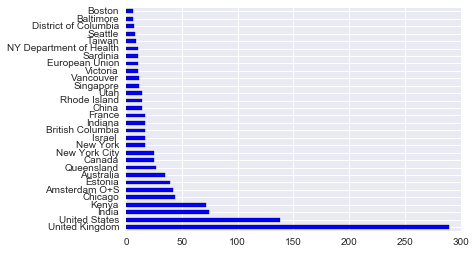

In [43]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
combined_cleaned['Item'].value_counts()[:30].plot(kind='barh')

# read use types #

In [63]:
use_types=pd.read_csv('combined_use_types.csv')
use_types.head()

,﻿Item Title,Publication Year,Publication Title,in/out,use types,census,notes
0,Multiple lines of evidence to identify sewage ...,2017,Water Research,in,"ancillary data source for new analysis (e.g., ...",NaN,NaN
1,Development of a model to simulate groundwater...,2017,Water Research,in,main data source for new analysis,NaN,NaN
2,Environmental siting framework for wind farms:...,2016,Resources,in,main data source for new analysis,NaN,NaN
3,Exergetic analysis and dynamic simulation of a...,2016,Journal of Cleaner Production,in,Providing study background,NaN,NaN
4,A preliminary investigation into the automatic...,2014,ACM International Conference Proceeding Series,in,used to demonstrate the effectiveness of a pro...,NaN,NaN


In [107]:
print use_types['Publication Title'].nunique()
publication_list = list(use_types['Publication Title'].unique())

793


In [64]:
count_item = pd.DataFrame(use_types['Publication Title'].value_counts()[:30])
count_item.head(30)


,Publication Title
PLoS ONE,32
BMC Public Health,14
Science of the Total Environment,13
Sustainability (Switzerland),12
BMJ Open,11
Scientific Reports,9
Social Science and Medicine,8
International Journal of Environmental Research and Public Health,8
Applied Geography,7
Proceedings of the ACM SIGMOD International Conference on Management of Data,7


In [68]:
scopus_areas = pd.read_csv('Scopus_Source_List_used.csv')
scopus_areas.head(10)

,﻿Sourcerecord id,Source Title,2016 CiteScore,2016 SJR,2016 SNIP,Open Acces status,Source Type,Title history indication,Related title to title history indication,Other related title 1,...,2700 Medicine,2800 Neuroscience,2900 Nursing,"3000 Pharmacology, Toxicology and Pharmaceutics",3100 Physics and Astronomy,3200 Psychology,3300 Social Sciences,3400 Veterinary,3500 Dentistry,3600 Health Professions
0,18500162600,21st Century Music,NaN,NaN,NaN,NaN,Journal,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21100404576,2D Materials,4.26,2.173,0.772,NaN,Journal,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Physics and Astronomy,NaN,NaN,NaN,NaN,NaN
2,21100447128,3 Biotech,2.15,0.106,0.000,DOAJ/ROAD Open Access,Journal,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21100779062,3D Printing and Additive Manufacturing,0.8,0.182,0.497,NaN,Journal,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21100229836,3D Research,0.62,0.168,0.422,NaN,Journal,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,19700200922,"3L: Language, Linguistics, Literature",0.38,0.289,0.885,DOAJ/ROAD Open Access,Journal,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Social Sciences,NaN,NaN,NaN
6,145295,4OR,1.83,1.452,1.574,NaN,Journal,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,21100399164,A & A case reports,0.53,0.219,NaN,NaN,Journal,NaN,NaN,NaN,...,Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,16400154734,A + U-Architecture and Urbanism,0.01,0.101,0.000,NaN,Journal,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Social Sciences,NaN,NaN,NaN
9,5700161051,A Contrario. Revue interdisciplinaire de scien...,0,0.101,0.000,NaN,Journal,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Social Sciences,NaN,NaN,NaN


In [70]:
scopus_columns = list(scopus_areas)
scopus_columns

['\xef\xbb\xbfSourcerecord id ',
 'Source Title',
 '2016 CiteScore',
 '2016\nSJR',
 '2016\nSNIP',
 'Open Acces status\n',
 'Source Type',
 'Title history indication',
 'Related title to title history indication',
 'Other related title 1',
 "Publisher's Country ",
 'All Science Classification Codes (ASJC)',
 'Top level:\n\nLife Sciences',
 'Top level:\n\nSocial Sciences',
 'Top level:\n\nPhysical Sciences',
 'Top level:\n\nHealth Sciences',
 '1000 \nGeneral',
 '1100\nAgricultural and Biological Sciences',
 '1200\nArts and Humanities',
 '1300\nBiochemistry, Genetics and Molecular Biology',
 '1400\nBusiness, Management and Accounting',
 '1500\nChemical Engineering',
 '1600\nChemistry',
 '1700\nComputer Science',
 '1800\nDecision Sciences',
 '1900\nEarth and Planetary Sciences',
 '2000\nEconomics, Econometrics and Finance',
 '2100\nEnergy',
 '2200\nEngineering',
 '2300\nEnvironmental Science',
 '2400\nImmunology and Microbiology',
 '2500\nMaterials Science',
 '2600\nMathematics',
 '2700\nM

In [139]:
research_area_df = pd.DataFrame(columns = scopus_columns)
research_area_df = scopus_areas.loc[scopus_areas['Source Title'].isin(publication_list)]
research_area_df.head()
len(research_area_df)

612

In [76]:
research_area_df_2 = scopus_areas.loc[scopus_areas['Related title to title history indication'].isin(publication_list)]
research_area_df_2

,﻿Sourcerecord id,Source Title,2016 CiteScore,2016 SJR,2016 SNIP,Open Acces status,Source Type,Title history indication,Related title to title history indication,Other related title 1,...,2700 Medicine,2800 Neuroscience,2900 Nursing,"3000 Pharmacology, Toxicology and Pharmaceutics",3100 Physics and Astronomy,3200 Psychology,3300 Social Sciences,3400 Veterinary,3500 Dentistry,3600 Health Professions
192,19400157885,Acta - Unio Internationalis Contra Cancrum,NaN,NaN,NaN,NaN,Journal,Continued as,International Journal of Cancer,NaN,...,Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539,110311,Acta Paediatrica Belgica,NaN,NaN,NaN,NaN,Journal,Incorporated in,European Journal of Pediatrics,NaN,...,Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
540,84684,Acta Paediatrica Hungarica,NaN,NaN,NaN,NaN,Journal,Incorporated in,European Journal of Pediatrics,Acta Paediatrica Academiae Scientiarum Hungaricae,...,Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
643,37297,Acta Radiologica Oncology,NaN,NaN,NaN,NaN,Journal,Continued as,Acta Oncologica,Acta Radiologica. Oncology Radiation Therapy P...,...,Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
990,21100780799,Advances in Environmental Research,NaN,NaN,NaN,NaN,Journal,Incorporated in,Journal of Environmental Management,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1177,31843,Advances in Tunnelling Technology and Subsurfa...,NaN,NaN,NaN,NaN,Journal,Continued as,Tunnelling and Underground Space Technology,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1463,57432,Air and water pollution,NaN,NaN,NaN,NaN,Journal,Continued as,Water Research,Atmospheric Environment,...,Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1869,61594,American journal of public health and the nati...,NaN,NaN,NaN,NaN,Journal,Continued as,American Journal of Public Health,The Nation's health,...,Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2167,24586,Animal Research,NaN,NaN,NaN,NaN,Journal,Continued as,Animal,Annales de Zootechnie,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2168,83409,Animal Science,NaN,NaN,NaN,NaN,Journal,Continued as,Animal,Animal production,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
research_area_df_3 = scopus_areas.loc[scopus_areas['Other related title 1'].isin(publication_list)]
research_area_df_3

,﻿Sourcerecord id,Source Title,2016 CiteScore,2016 SJR,2016 SNIP,Open Acces status,Source Type,Title history indication,Related title to title history indication,Other related title 1,...,2700 Medicine,2800 Neuroscience,2900 Nursing,"3000 Pharmacology, Toxicology and Pharmaceutics",3100 Physics and Astronomy,3200 Psychology,3300 Social Sciences,3400 Veterinary,3500 Dentistry,3600 Health Professions
1463,57432,Air and water pollution,NaN,NaN,NaN,NaN,Journal,Continued as,Water Research,Atmospheric Environment,...,Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3696,33806,Atmospheric Environment - Part A General Topics,NaN,NaN,NaN,NaN,Journal,Continued as,Atmospheric Environment,Atmospheric Environment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3697,36459,Atmospheric Environment - Part B Urban Atmosphere,NaN,NaN,NaN,NaN,Journal,Continued as,Atmospheric Environment,Atmospheric Environment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10182,92397,Environment and Planning,NaN,NaN,NaN,NaN,Journal,Continued as,Environment & Planning B,Environment and Planning A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18660,5700165814,"Journal of Criminal Law, Criminology and Polic...",NaN,NaN,NaN,NaN,Journal,Continued as,Journal of Police Science and Administration,Journal of Criminal Law and Criminology,...,Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19424,92288,Journal of health education / Association for ...,NaN,NaN,NaN,NaN,Journal,Continued as,American Journal of Health Education,Health Education,...,Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
title_to_areas =research_area_df

In [151]:
# frames = [research_area_df, research_area_df_2, research_area_df_3]
# title_to_areas = pd.concat(frames)
# len(title_to_areas)
# title_to_areas.drop_duplicates()
# len(title_to_areas)

In [152]:
title_to_areas = title_to_areas.reset_index()

In [153]:
# title_to_areas.to_csv('title_to_areas.csv')

In [154]:
leftover_titles = set(publication_list)-set(list(title_to_areas['Source Title']))
len(leftover_titles)

186

In [155]:
conference_scopus = pd.read_csv('conference_scopus.csv')
conf_titles = set(list(conference_scopus['Source title ']))
codes = set(list(conference_scopus['ASJC code']))
conference_scopus.head()
codes

{nan,
 '1700;  1706;  1705; ',
 '2214; 1709; 3304; ',
 '2211;  2205;  2215; ',
 '2200;  1900; ',
 '2207;  1706;  1708;  1703; ',
 '3309; 1712; 1710; 1706; ',
 '2310; 1908; ',
 '3308;  1403;  1706; ',
 '1707;  1708;  1705; ',
 '1711;  1802;  1705; ',
 '2614;  2207;  1708;  1705; ',
 '1304;  1305;  2204; ',
 '1401;  2003;  1702; ',
 '3315;  1711;  1705; ',
 '1100;  2312; ',
 '2204;  1704; ',
 '2104; 3106; 3304; ',
 '3302;  1204; ',
 '3308;  2300; 3313;  2210; ',
 '2209;  1703;  1702; ',
 '1705; ',
 '3315;  2207;  1706;  1705; ',
 '2200;  1712;  1708; ',
 '2207; 2208; 1706; 1705; ',
 '1707;  1708;  1703; ',
 '1712; 1707; 1704; ',
 '1904;  1903;  1802; ',
 '2718;  1712; 3605; ',
 '2214;  1700;  2208;  2209; ',
 '2209;  1709;  1702; ',
 '2506;',
 '1710;  1707;  1702;  1704; ',
 '2100;  2305; ',
 '2105;  2102; ',
 '2300;  2205; ',
 '2200;',
 '1213; 1702; ',
 '1711; 1710; 1706; 1703; ',
 '2203; 2505; 2508; ',
 '2209; 1706; 1702; ',
 '2213;  2211;  2102;  2210; ',
 '2208;  1706;  2210;  1704; 

In [147]:
# conf_titles.remove('nan')

In [156]:

conference_scopus['ASJC code'][conference_scopus['Source title '==conf_title]]

KeyError: False

In [157]:
index = len(title_to_areas)
for leftover in leftover_titles:
    for conf_title in conf_titles:
        if type(conf_title)==float:
            pass
        elif leftover in conf_title:
            
            try: 
                title_to_areas.set_value(index, 'Source Title', leftover)
                code = conference_scopus['ASJC code'][conference_scopus['Source title '==conf_title]]
    #             print code
                title_to_areas.set_value(index, 'All Science Classification Codes (ASJC)', code)
#                 index = index + 1
                break
            except:
                title_to_areas.set_value(index, 'Source Title', leftover)
#                 index = index + 1
        index = index + 1
        
title_to_areas        

,index,﻿Sourcerecord id,Source Title,2016 CiteScore,2016 SJR,2016 SNIP,Open Acces status,Source Type,Title history indication,Related title to title history indication,...,2700 Medicine,2800 Neuroscience,2900 Nursing,"3000 Pharmacology, Toxicology and Pharmaceutics",3100 Physics and Astronomy,3200 Psychology,3300 Social Sciences,3400 Veterinary,3500 Dentistry,3600 Health Professions
0,96,19532,Accident Analysis and Prevention,3.24,1.490,1.970,NaN,Journal,NaN,NaN,...,Medicine,NaN,NaN,NaN,NaN,NaN,Social Sciences,NaN,NaN,NaN
1,513,28668,Acta Oncologica,2.67,1.385,1.171,NaN,Journal,Formerly known as,Acta Radiologica Oncology,...,Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,778,24763,Addictive Behaviors,3.14,1.530,1.230,NaN,Journal,NaN,NaN,...,Medicine,NaN,NaN,"Pharmacology, Toxicology and Pharmaceutics",NaN,Psychology,NaN,NaN,NaN,NaN
3,795,21100258637,Administratie si Management Public,0.47,0.364,0.412,NaN,Journal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Social Sciences,NaN,NaN,NaN
4,1174,26915,Advances in Therapy,2.74,0.927,1.061,NaN,Journal,NaN,NaN,...,Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1203,14000156235,Aerosol and Air Quality Research,2.81,0.934,1.125,NaN,Journal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1248,17100154728,African Diaspora,0.39,0.292,0.451,DOAJ/ROAD Open Access,Book Series,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Social Sciences,NaN,NaN,NaN
7,1254,145316,African Health Sciences,0.8,0.380,0.565,NaN,Journal,NaN,NaN,...,Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1317,28093,Age and Ageing,3.85,1.864,1.745,NaN,Journal,NaN,NaN,...,Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1375,35824,Agricultural Water Management,3.31,1.264,1.803,NaN,Journal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
title_to_areas.to_csv('title_to_areas_trail.csv')

In [104]:
title_to_areas[title_to_areas.index.duplicated()]



,index,﻿Sourcerecord id,Source Title,2016 CiteScore,2016 SJR,2016 SNIP,Open Acces status,Source Type,Title history indication,Related title to title history indication,...,2700 Medicine,2800 Neuroscience,2900 Nursing,"3000 Pharmacology, Toxicology and Pharmaceutics",3100 Physics and Astronomy,3200 Psychology,3300 Social Sciences,3400 Veterinary,3500 Dentistry,3600 Health Professions


In [105]:
index = len(title_to_areas)
for title in leftover_titles:
    title_to_areas.set_value(index, 'Source Title', title)
    index = index + 1
title_to_areas

,index,﻿Sourcerecord id,Source Title,2016 CiteScore,2016 SJR,2016 SNIP,Open Acces status,Source Type,Title history indication,Related title to title history indication,...,2700 Medicine,2800 Neuroscience,2900 Nursing,"3000 Pharmacology, Toxicology and Pharmaceutics",3100 Physics and Astronomy,3200 Psychology,3300 Social Sciences,3400 Veterinary,3500 Dentistry,3600 Health Professions
0,96,19532,Accident Analysis and Prevention,3.24,1.490,1.970,NaN,Journal,NaN,NaN,...,Medicine,NaN,NaN,NaN,NaN,NaN,Social Sciences,NaN,NaN,NaN
1,513,28668,Acta Oncologica,2.67,1.385,1.171,NaN,Journal,Formerly known as,Acta Radiologica Oncology,...,Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,778,24763,Addictive Behaviors,3.14,1.530,1.230,NaN,Journal,NaN,NaN,...,Medicine,NaN,NaN,"Pharmacology, Toxicology and Pharmaceutics",NaN,Psychology,NaN,NaN,NaN,NaN
3,795,21100258637,Administratie si Management Public,0.47,0.364,0.412,NaN,Journal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Social Sciences,NaN,NaN,NaN
4,1174,26915,Advances in Therapy,2.74,0.927,1.061,NaN,Journal,NaN,NaN,...,Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1203,14000156235,Aerosol and Air Quality Research,2.81,0.934,1.125,NaN,Journal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1248,17100154728,African Diaspora,0.39,0.292,0.451,DOAJ/ROAD Open Access,Book Series,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Social Sciences,NaN,NaN,NaN
7,1254,145316,African Health Sciences,0.8,0.380,0.565,NaN,Journal,NaN,NaN,...,Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1317,28093,Age and Ageing,3.85,1.864,1.745,NaN,Journal,NaN,NaN,...,Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1375,35824,Agricultural Water Management,3.31,1.264,1.803,NaN,Journal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
title_to_areas.to_csv('title_to_areas.csv')

In [159]:
title_to_areas_manual_final = pd.read_csv('title_to_areas_manual_final.csv')
title_to_areas_manual_final.head()

,Unnamed: 0,index,Source Title,All Science Classification Codes (ASJC),Top level: Life Sciences,Top level: Social Sciences,Top level: Physical Sciences,Top level: Health Sciences,1000 General,1100 Agricultural and Biological Sciences,...,3600 Health Professions,2016 CiteScore,2016 SJR,2016 SNIP,Open Acces status,Source Type,Title history indication,Related title to title history indication,Other related title 1,Publisher's Country
0,0,96,Accident Analysis and Prevention,3308; 2739; 2213; 2700; 3307;,NaN,Social Sciences,Physical Sciences,Health Sciences,NaN,NaN,...,NaN,3.24,1.490,1.970,NaN,Journal,NaN,NaN,NaN,United Kingdom
1,1,513,Acta Oncologica,2741; 2730; 2720; 2700;,NaN,NaN,NaN,Health Sciences,NaN,NaN,...,NaN,2.67,1.385,1.171,NaN,Journal,Formerly known as,Acta Radiologica Oncology,NaN,United Kingdom
2,2,778,Addictive Behaviors,2738; 3005; 3203; 2701;,Life Sciences,Social Sciences,NaN,Health Sciences,NaN,NaN,...,NaN,3.14,1.530,1.230,NaN,Journal,NaN,NaN,NaN,United Kingdom
3,3,795,Administratie si Management Public,3321; 3312;,NaN,Social Sciences,NaN,NaN,NaN,NaN,...,NaN,0.47,0.364,0.412,NaN,Journal,NaN,NaN,NaN,Romania
4,4,1174,Advances in Therapy,2736; 2700;,NaN,NaN,NaN,Health Sciences,NaN,NaN,...,NaN,2.74,0.927,1.061,NaN,Journal,NaN,NaN,NaN,United States


In [168]:
title_to_areas_slice = title_to_areas_manual_final[['Source Title','All Science Classification Codes (ASJC)']]
len(use_types)

1252

In [178]:
list(use_types)

['\xef\xbb\xbfItem Title',
 'Publication Year',
 'Publication Title',
 'in/out',
 'use types',
 'census',
 'notes']

In [188]:
use_types = use_types.rename(columns={'Item Titlee': 'Item Title'})
list(use_types)

['Item Title',
 'Publication Year',
 'Publication Title',
 'in/out',
 'use types',
 'census',
 'notes']

In [189]:
title_to_areas_slice = title_to_areas_slice.rename(columns={'Source Title': 'Publication Title'})

In [190]:
merged_types_areas = pd.merge(title_to_areas_slice, use_types, on='Publication Title',how='inner')
len(merged_types_areas)

1261

In [191]:
# remove duplicated article titles, because additonal usage types were added "
merged_types_areas_cleaned = merged_types_areas[merged_types_areas.duplicated('Item Title')==False]

In [192]:
len(merged_types_areas_cleaned)

1194

In [193]:
merged_types_areas_cleaned.to_csv('merged_types_areas.csv')

In [201]:
count_item = pd.DataFrame(merged_types_areas_cleaned['Publication Title'].value_counts()[:30])
count_item.head(30)
top_journals = list(count_item.index.values)

In [202]:
top_journals

['PLoS ONE',
 'BMC Public Health',
 'Science of the Total Environment',
 'Sustainability (Switzerland)',
 'BMJ Open',
 'Scientific Reports',
 'International Journal of Environmental Research and Public Health',
 'Social Science and Medicine',
 'Journal of Transport Geography',
 'ACM International Conference Proceeding Series',
 'Landscape and Urban Planning',
 'Environment International',
 'British Journal of Cancer',
 'Journal of Public Health (United Kingdom)',
 'Proceedings of the ACM SIGMOD International Conference on Management of Data',
 'Applied Geography',
 'Health and Place',
 'Theoretical and Applied Climatology',
 'Energy Policy',
 'Natural Hazards and Earth System Sciences',
 'CEUR Workshop Proceedings',
 'Environmental Monitoring and Assessment',
 'Energies',
 'BMJ (Online)',
 'BMC Health Services Research',
 'International Journal of Behavioral Nutrition and Physical Activity',
 'American Journal of Public Health',
 'Hydrology and Earth System Sciences',
 'Global Environm

In [203]:
# top_journals_df = merged_types_areas_cleaned.loc[merged_types_areas_cleaned['Publication Title'].isin(top_journals)]

# top_journals_df.to_csv('top_journals_df.csv')

In [ ]:
to_journal_df=pd.DataFrame(columns=['Publication Title','Count','Class_Code','Class'])


# breakdown of research areas #

In [204]:
merged_types_areas_cleaned.head()

,Publication Title,All Science Classification Codes (ASJC),Item Title,Publication Year,in/out,use types,census,notes
0,Accident Analysis and Prevention,3308; 2739; 2213; 2700; 3307;,Evaluating public education messages aimed at ...,2017,in,aiding result interpreting,NaN,NaN
1,Accident Analysis and Prevention,3308; 2739; 2213; 2700; 3307;,Application of a random effects negative binom...,2016,in,main data source for new analysis,NaN,NaN
2,Accident Analysis and Prevention,3308; 2739; 2213; 2700; 3307;,Safety impacts of platform tram stops on pedes...,2016,in,main data source for new analysis,NaN,NaN
3,Acta Oncologica,2741; 2730; 2720; 2700;,Recent changes in breast cancer incidence and ...,2016,in,main data source for new analysis,NaN,NaN
4,Addictive Behaviors,2738; 3005; 3203; 2701;,Injection drug use and overdose among young ad...,2018,in,Providing study background,NaN,NaN


In [212]:
code_list = list(merged_types_areas_cleaned['All Science Classification Codes (ASJC)'])
flat_code_list = list()
for codes in code_list:
    codes = str(codes)
    code_strings=codes.split(';')
    for c in code_strings:
        flat_code_list.append(c.strip())
        
len(flat_code_list)  

3804

In [216]:
from collections import Counter
code_count_dict = Counter(flat_code_list)
del code_count_dict['']

In [220]:
code_count = pd.DataFrame(code_count_dict.items(), columns=['code', 'count'])
code_count.head()

,code,count
0,2713,17
1,1306,11
2,2711,5
3,1300,39
4,2717,3


In [218]:
code_count.to_csv('code_count.csv')

In [224]:
for i in range(0,len(code_count)):
    code = code_count['code'][i]
    if code is not np.nan:
        
        top = code[0:2]+'00'
        
        code_count.set_value(i, 'top_level', top)
    

In [225]:
code_count.head()

,code,count,top_level
0,2713,17,2700
1,1306,11,1300
2,2711,5,2700
3,1300,39,1300
4,2717,3,2700


In [226]:
code_count.to_csv('code_count.csv')

In [228]:
code_count.groupby('top_level').sum()

,count
top_level,
1000,12
1100,177
1200,43
1300,79
1400,46
1500,3
1600,6
1700,237
1800,17


# types of use #

In [59]:
count_item = pd.DataFrame(use_types['use types'].value_counts()[:30])
count_item.head(30)

,use types
main data source for new analysis,400
Providing study background,308
"ancillary data source for new analysis (e.g., as base map)",235
"used to demonstrate the effectiveness of a proposed new method (e.g., a new visualization method).",104
aiding result interpreting,82
others,44
"Providing innovative services or platforms based on OGD (e.g., an application that aggregates all air pollution information)",37
"used for result evaluation (e.g., as ground truth)",21
Creating a composite dataset,13
"Providing study background (describing study area or population, support a claim in introduction/motivation)",1


In [57]:
count_item = pd.DataFrame(use_types['Publication Year'].value_counts()[:30])
count_item.head(30)

,Publication Year
2016,308
2015,285
2017,261
2014,172
2013,91
2012,62
2011,37
2010,20
2009,14
Politics and Policy,1
